<a href="https://colab.research.google.com/github/UdaraHela/Finalproject/blob/main/Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:

import yfinance as yf

# Download Tesla stock data
tesla_data = yf.download('TSLA')

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [32]:

import yfinance as yf

# Download GameStop (GME) stock data
gme_data = yf.download("GME", start="2024-01-01", end="2025-03-07")

# Reset the index
gme_data.reset_index(inplace=True)

# Save to CSV file
gme_data.to_csv("gme_stock_data.csv", index=False)

# Display the first five rows
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date      Close       High        Low       Open   Volume
Ticker                   GME        GME        GME        GME      GME
0      2024-01-02  16.670000  17.600000  16.580000  17.250000  4428000
1      2024-01-03  16.690001  16.830000  15.900000  16.299999  4193600
2      2024-01-04  16.360001  16.750000  16.309999  16.510000  2671500
3      2024-01-05  15.960000  16.520000  15.960000  16.160000  2615700
4      2024-01-08  15.790000  16.120001  15.700000  15.780000  3031100


In [50]:

pip install yfinance matplotlib

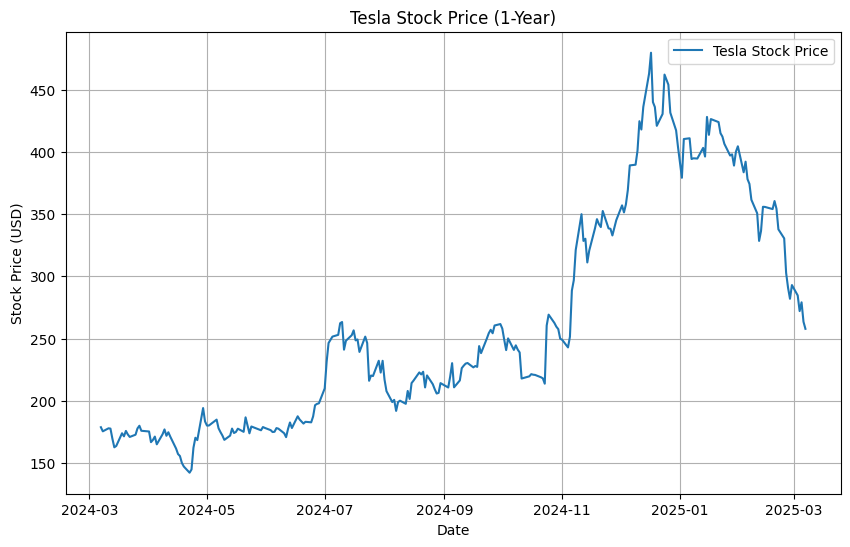

In [51]:

import yfinance as yf
import matplotlib.pyplot as plt

# Download Tesla stock data
tesla = yf.Ticker('TSLA')
data = tesla.history(period='1y')  # 1-year data

# Plot the stock data
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Tesla Stock Price')
plt.title('Tesla Stock Price (1-Year)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [52]:

pip install yfinance matplotlib

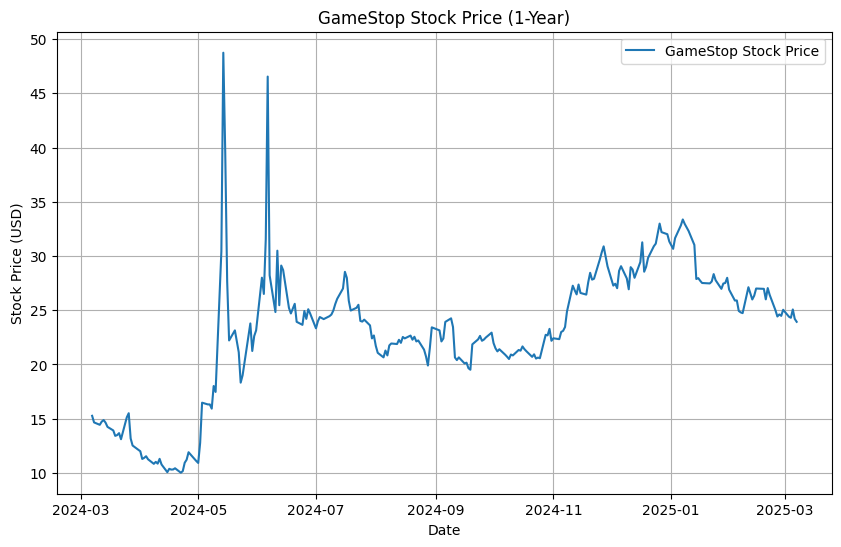

In [53]:

import yfinance as yf
import matplotlib.pyplot as plt

# Download GameStop stock data
gamestop = yf.Ticker('GME')
data = gamestop.history(period='1y')  # 1-year data

# Plot the stock data
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='GameStop Stock Price')
plt.title('GameStop Stock Price (1-Year)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [54]:

pip install requests beautifulsoup4 pandas

In [55]:

import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the page that contains Tesla's revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send a GET request to fetch the page content
response = requests.get(url)

# Parse the page content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table that contains Tesla's revenue data (based on the page structure)
table = soup.find('table')

# Extract all rows of the table
rows = table.find_all('tr')

# Extract column names from the first row
columns = [col.text for col in rows[0].find_all('th')]

# Extract data from the remaining rows
data = []
for row in rows[1:]:
    cells = row.find_all('td')
    data.append([cell.text.strip() for cell in cells])

# Create a DataFrame from the extracted data
tesla_revenue = pd.DataFrame(data, columns=columns)

# Display the last five rows of the DataFrame
print(tesla_revenue.tail())

AttributeError: 'NoneType' object has no attribute 'find_all'

In [56]:

if table:
    rows = table.find_all('tr')
else:
    print("No table found!")

No table found!


In [57]:

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url, headers=headers)

In [58]:

pip install selenium

In [59]:

from selenium import webdriver
import time
import pandas as pd

# Set up Selenium WebDriver (ensure you have the correct path to the driver)
driver = webdriver.Chrome(executable_path='/path/to/chromedriver')

# Open the URL
driver.get("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue")

# Wait for the page to load
time.sleep(5)  # You can adjust the sleep time

# Get the page source after rendering
page_source = driver.page_source

# Parse the page with BeautifulSoup
soup = BeautifulSoup(page_source, 'html.parser')

# Find the table
table = soup.find('table')

# Extract rows and process as before
if table:
    rows = table.find_all('tr')
    columns = [col.text for col in rows[0].find_all('th')]
    data = [[cell.text.strip() for cell in row.find_all('td')] for row in rows[1:]]
    tesla_revenue = pd.DataFrame(data, columns=columns)
    print(tesla_revenue.tail())
else:
    print("No table found!")

# Close the driver
driver.quit()

TypeError: WebDriver.__init__() got an unexpected keyword argument 'executable_path'